### Predicting Heart Failure with Machine Learning Classifiers

Importing Libraries

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df = pd.DataFrame(data)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Preprocessing

In [3]:
# Check for NaN values
print("Missing values in each column:")
print(df.isna().sum())

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Get a summary of statistics
print("Summary statistics:")
print(df.describe())

# Check for any potential data type issues
print("Data types of each column:")
print(df.dtypes)

Missing values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Number of duplicate rows: 0
Summary statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    

Normlization

In [4]:
# Data Normalization for numerical features
scaler = MinMaxScaler()

numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
# Apply MinMaxScaler to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Data after normalization:")
print(df.head())

Data after normalization:
        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.636364        0                  0.071319         0           0.090909   
1  0.272727        0                  1.000000         0           0.363636   
2  0.454545        0                  0.015693         0           0.090909   
3  0.181818        1                  0.011227         0           0.090909   
4  0.454545        1                  0.017479         1           0.090909   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1   0.290823          0.157303      0.485714    1   
1                    0   0.288833          0.067416      0.657143    1   
2                    0   0.165960          0.089888      0.457143    1   
3                    0   0.224148          0.157303      0.685714    1   
4                    0   0.365984          0.247191      0.085714    0   

   smoking  time  DEATH_EVENT  
0        0     4      

Split the data into train and test set

In [5]:
X = df.drop('DEATH_EVENT', axis=1)  # All columns except the target
y = df['DEATH_EVENT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##SVM

Finding Best Parameters

In [6]:
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.001, 0.0001]
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [7]:
# Create a new SVM classifier with the best parameters
svm_best_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma=0.1,
    random_state=42
)

Test The Model

In [8]:
svm_best_model.fit(X_train, y_train)

SVC(gamma=0.1, random_state=42)

Confusion Matrix:
[[38  3]
 [ 9 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.77      0.53      0.62        19

    accuracy                           0.80        60
   macro avg       0.79      0.73      0.74        60
weighted avg       0.80      0.80      0.79        60

Accuracy: 0.80


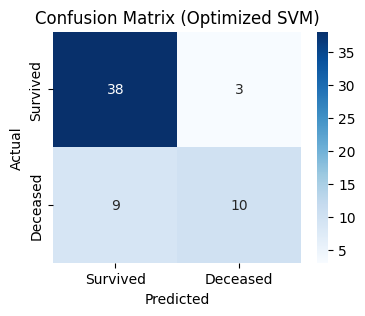

In [9]:
y_pred_best = svm_best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Deceased'], yticklabels=['Survived', 'Deceased'])
plt.title('Confusion Matrix (Optimized SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Logistic Regression

Finding Best Parameters

In [10]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2 regularization
}

In [11]:
# Perform grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [15]:
# Output the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [13]:
# Create a new Logistic Regression model with the best parameters
logistic_best_model = LogisticRegression(
    C=grid_search.best_params_['C'],
    penalty=grid_search.best_params_['penalty'],
    solver='liblinear',
    random_state=42
)

Test The Model

In [14]:
# Test the Model
logistic_best_model.fit(X_train, y_train)

y_pred_best = logistic_best_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")

Confusion Matrix:
[[39  2]
 [ 9 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.83      0.53      0.65        19

    accuracy                           0.82        60
   macro avg       0.82      0.74      0.76        60
weighted avg       0.82      0.82      0.80        60

Accuracy: 0.82


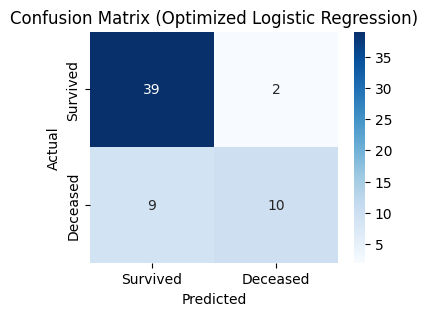

In [16]:
# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Deceased'], yticklabels=['Survived', 'Deceased'])
plt.title('Confusion Matrix (Optimized Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###XGBoost

Finding Best Parameters

In [17]:
# Convert data into DMatrix format (XGBoost specific format)
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

In [18]:
# Define XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

In [19]:

# Hyperparameters to tune using GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

In [20]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [21]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [22]:
# Get the best model
best_model = grid_search.best_estimator_

In [23]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.7}


Test The Model

In [24]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

Confusion Matrix:
[[39  2]
 [ 7 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60

Accuracy: 0.85


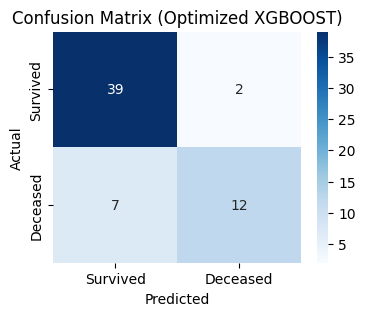

In [26]:
# Test the model and Plot confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Survived', 'Deceased'], yticklabels=['Survived', 'Deceased'])
plt.title('Confusion Matrix (Optimized XGBOOST)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()